# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#test changes

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#test_cities = cities[:5]
#print(test_cities)

626

In [10]:
#create data frame
cities_df = pd.DataFrame()
cities_df['City'] = ''
cities_df['Lat'] = ''
cities_df['Lng'] = ''
cities_df['Max Temp'] = ''
cities_df['Humidity'] = ''
cities_df['Cloudiness'] = ''
cities_df['Wind Speed'] = ''
cities_df['Country'] = ''

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?"

#city = 'anaheim'

for city in cities:
    query_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=imperial'
    weather_response = requests.get(query_url).json()

    try:
        city_index = cities.index(city) + 1
        city_name = weather_response['name']
        
        print(f'Retrieving result {city_index} for city name:{city_name}')
        
        cities_df.loc[city, 'City'] = city_name
        cities_df.loc[city, 'Lat'] = weather_response['coord']['lat']
        cities_df.loc[city, 'Lng'] = weather_response['coord']['lon'] 
        cities_df.loc[city, 'Max Temp'] = weather_response['main']['temp_max']
        cities_df.loc[city, 'Humidity'] = weather_response['main']['humidity']
        cities_df.loc[city, 'Cloudiness'] = weather_response['clouds']['all']
        cities_df.loc[city, 'Wind Speed'] = weather_response['wind']['speed']
        cities_df.loc[city, 'Country'] = weather_response['sys']['country']
    except (KeyError, IndexError):
        print('Missing info')
        
        
#print(query_url)
#weather_response

Missing info
Retrieving result 2 for city name:Rikitea
Retrieving result 3 for city name:Saint-Pierre
Retrieving result 4 for city name:Jamestown
Retrieving result 5 for city name:Puteyets
Retrieving result 6 for city name:Piaçabuçu
Retrieving result 7 for city name:Shache
Retrieving result 8 for city name:Clyde River
Retrieving result 9 for city name:Chapleau
Missing info
Retrieving result 11 for city name:Ossora
Retrieving result 12 for city name:Chui
Retrieving result 13 for city name:São Félix do Xingu
Retrieving result 14 for city name:Ahipara
Retrieving result 15 for city name:Poum
Retrieving result 16 for city name:Hobart
Retrieving result 17 for city name:Punta Arenas
Retrieving result 18 for city name:Shimoda
Retrieving result 19 for city name:Torbay
Retrieving result 20 for city name:Albany
Retrieving result 21 for city name:Mar del Plata
Retrieving result 22 for city name:Bredasdorp
Retrieving result 23 for city name:San Patricio
Missing info
Retrieving result 25 for city na

Retrieving result 195 for city name:Maumere
Retrieving result 196 for city name:Vila Franca do Campo
Retrieving result 197 for city name:Pevek
Retrieving result 198 for city name:Lima
Retrieving result 199 for city name:Lebu
Retrieving result 200 for city name:Malé
Missing info
Retrieving result 202 for city name:Sumkino
Retrieving result 203 for city name:Cayenne
Missing info
Retrieving result 205 for city name:Wasilla
Retrieving result 206 for city name:Saint Paul Harbor
Retrieving result 207 for city name:Rujewa
Retrieving result 208 for city name:Kahului
Retrieving result 209 for city name:Atikokan
Retrieving result 210 for city name:Mareeba
Retrieving result 211 for city name:Corowa
Retrieving result 212 for city name:Padang
Retrieving result 213 for city name:Grand Gaube
Retrieving result 214 for city name:Adolfo López Mateos
Retrieving result 215 for city name:Mapastepec
Retrieving result 216 for city name:Lipari
Retrieving result 217 for city name:Kincardine
Retrieving result 2

Retrieving result 383 for city name:Khanbari
Retrieving result 384 for city name:Standerton
Retrieving result 385 for city name:Maraã
Retrieving result 386 for city name:Hamilton
Retrieving result 387 for city name:Kapan
Retrieving result 388 for city name:Sekoma
Retrieving result 389 for city name:Beloha
Retrieving result 390 for city name:Arraial do Cabo
Missing info
Retrieving result 392 for city name:Dzhebariki-Khaya
Retrieving result 393 for city name:Three Hills
Retrieving result 394 for city name:Chapais
Retrieving result 395 for city name:Sestri Levante
Retrieving result 396 for city name:Woodward
Retrieving result 397 for city name:Berlevåg
Retrieving result 398 for city name:Laguna
Retrieving result 399 for city name:Jurm
Retrieving result 400 for city name:Konya Province
Retrieving result 401 for city name:Shingū
Retrieving result 402 for city name:Salinópolis
Retrieving result 403 for city name:Zhangjiakou
Retrieving result 404 for city name:Guerrero Negro
Retrieving result

Retrieving result 575 for city name:Huai'an
Retrieving result 576 for city name:La Ronge
Retrieving result 577 for city name:Anchorage
Retrieving result 578 for city name:Caucayá
Retrieving result 579 for city name:Taywarah
Retrieving result 580 for city name:Jiaocheng
Missing info
Retrieving result 582 for city name:Rawson
Retrieving result 583 for city name:Bagdarin
Retrieving result 584 for city name:Stokmarknes
Retrieving result 585 for city name:Visby
Retrieving result 586 for city name:Tromsø
Retrieving result 587 for city name:Vorotynsk
Retrieving result 588 for city name:Santa Cruz de la Sierra
Missing info
Retrieving result 590 for city name:Atambua
Retrieving result 591 for city name:Marrakesh
Retrieving result 592 for city name:Marzuq
Retrieving result 593 for city name:Edinburgh
Retrieving result 594 for city name:Rumoi
Retrieving result 595 for city name:Presidencia Roque Sáenz Peña
Retrieving result 596 for city name:Harper
Missing info
Retrieving result 598 for city name

In [12]:
#test_cities_df = test_cities_df.iloc[0:0]
final_cities_df = cities_df.reset_index(drop=True)
final_cities_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Rikitea,-23.12,-134.97,77.18,65,1,2.51,PF
1,Saint-Pierre,-21.34,55.48,77,73,9,17.22,RE
2,Jamestown,42.1,-79.24,33.01,92,90,5.82,US
3,Puteyets,65.17,57.09,32.72,92,68,8.03,RU
4,Piaçabuçu,-10.41,-36.43,80.89,81,6,8.05,BR
5,Shache,38.42,77.24,53.19,60,100,1.86,CN
6,Clyde River,70.47,-68.59,10.4,85,40,18.34,CA
7,Chapleau,47.84,-83.4,35.6,37,75,8.05,CA
8,Ossora,59.24,163.07,19.98,91,0,7.18,RU
9,Chui,-33.7,-53.46,64.42,77,2,6.64,UY


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
final_cities_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
cities_weather = final_cities_df.copy()
over_humidity = cities_weather.loc[cities_weather['Humidity'] > 100, : ]
over_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country


In [ ]:
#  Get the indices of cities that have humidity over 100%.

#n/a

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#n/a

In [ ]:
# Extract relevant fields from the data frame

#n/a

# Export the City_Data into a csv

#n/a

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [16]:
cities_weather.info()

cities_weather_df = cities_weather.astype({'Lat': float, 'Lng': float, 'Max Temp': float, 'Humidity': float, 'Cloudiness': float, 'Wind Speed': float})

cities_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 8 columns):
City          581 non-null object
Lat           581 non-null object
Lng           581 non-null object
Max Temp      581 non-null object
Humidity      581 non-null object
Cloudiness    581 non-null object
Wind Speed    581 non-null object
Country       581 non-null object
dtypes: object(8)
memory usage: 36.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 8 columns):
City          581 non-null object
Lat           581 non-null float64
Lng           581 non-null float64
Max Temp      581 non-null float64
Humidity      581 non-null float64
Cloudiness    581 non-null float64
Wind Speed    581 non-null float64
Country       581 non-null object
dtypes: float64(6), object(2)
memory usage: 36.4+ KB


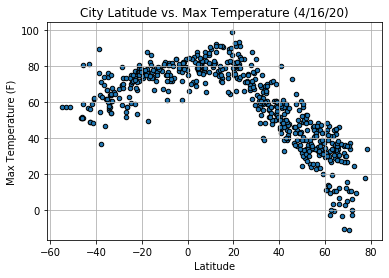

In [26]:
cities_weather_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, edgecolor='black')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (4/16/20)')
plt.savefig('output_data/Lat_vs_Temp.png')
plt.show()


## Latitude vs. Humidity Plot

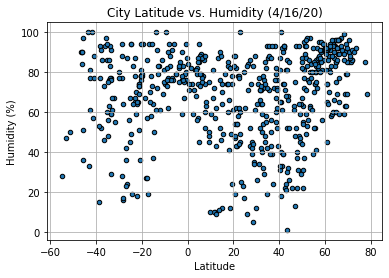

In [25]:
cities_weather_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True, edgecolor='black')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (4/16/20)')
plt.savefig('output_data/Lat_vs_Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

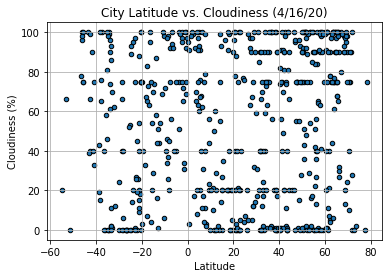

In [24]:
cities_weather_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, edgecolor='black')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (4/16/20)')
plt.savefig('output_data/Lat_vs_Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

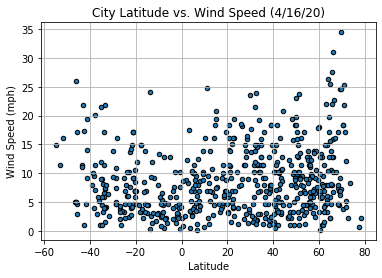

In [23]:
cities_weather_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, edgecolor='black')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (4/16/20)')
plt.savefig('output_data/Lat_vs_Wind_Speed.png')
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [29]:
# Create Northern and Southern Hemisphere DataFrames
#final_cities_df.head()

northern_df = final_cities_df.loc[final_cities_df['Lat'] > 0, :]
print(northern_df)

southern_df = final_cities_df.loc[final_cities_df['Lat'] < 0, :]
print(southern_df)

            City    Lat    Lng Max Temp Humidity Cloudiness Wind Speed Country
2      Jamestown   42.1 -79.24    33.01       92         90       5.82      US
3       Puteyets  65.17  57.09    32.72       92         68       8.03      RU
5         Shache  38.42  77.24    53.19       60        100       1.86      CN
6    Clyde River  70.47 -68.59     10.4       85         40      18.34      CA
7       Chapleau  47.84  -83.4     35.6       37         75       8.05      CA
..           ...    ...    ...      ...      ...        ...        ...     ...
576         Lata  40.16  -8.33       59       81          0       1.28      PT
577    Tilichiki  60.47  166.1    10.99       92          1        9.8      RU
578    Ilulissat  69.22  -51.1     30.2       63         98       6.93      GL
579         Yuli    9.7  10.27    90.82       10          0       0.67      NG
580         Oyem    1.6  11.58    70.39       82         98       2.55      GA

[412 rows x 8 columns]
                   City    L

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7892325475766203


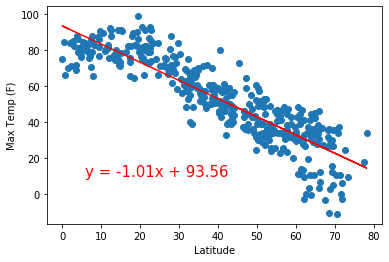

In [31]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern_df['Lat'].astype('float')
y_values = northern_df['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

### Analysis
In the  northern hemisphere there is a strong negative correlation between latitude and max temp.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.43463249209190563


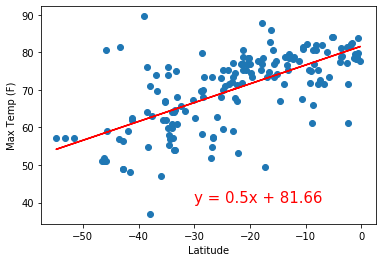

In [33]:
x_values = southern_df['Lat'].astype('float')
y_values = southern_df['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

### Analysis
The correlation between latitude and max temp is not as strong in the southen hemisphere as it is in the northern but its positive rather than negative

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.08772980848523734


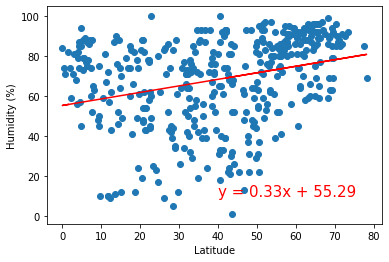

In [35]:
x_values = northern_df['Lat'].astype('float')
y_values = northern_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

### Analysis
There is a very weak correalation between latitude and humidity in the northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.03707975127628643


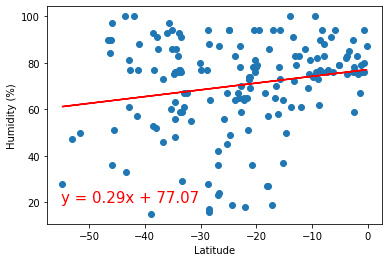

In [37]:
x_values = southern_df['Lat'].astype('float')
y_values = southern_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

### Analysis
There is an even weaker correlation between latitude and humidity in the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.03446921424063956


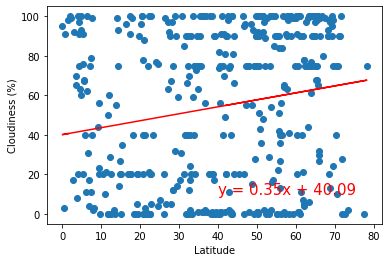

In [38]:
x_values = northern_df['Lat'].astype('float')
y_values = northern_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

### Analysis
There is almost no correlation between latitude and cloudiness

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.01821507204611983


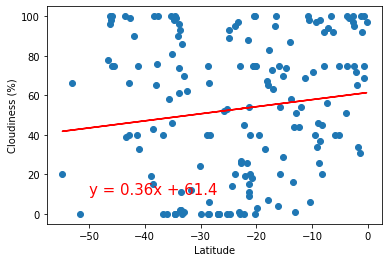

In [40]:
x_values = southern_df['Lat'].astype('float')
y_values = southern_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

### Analysis
Same for the southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.020711219907606486


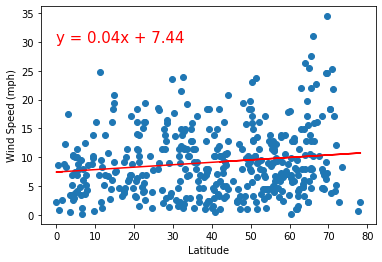

In [42]:
x_values = northern_df['Lat'].astype('float')
y_values = northern_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.10992201489949384


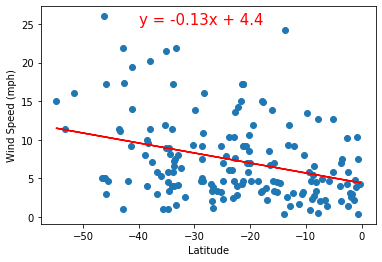

In [44]:
x_values = southern_df['Lat'].astype('float')
y_values = southern_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

### Analysis
There is almost no correlation between latitide and wind speed in either hemisphere

## Obervable Trends
The first trend noticed is that it appears that in the northern hemisphere latitude plays a larger role in the weather than in the southern hemisphere. In both hemispheres, latitude plays almost no role in the level of cloudiness. Temperature is the most affected by latitude in both hemispheres.